In [1]:
## Importables
from platform import python_version
print(f"Python version {python_version()}")

import sys
import os

sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from math import log10, log2, ceil, floor, sqrt

# And grab the helpers
import sys
sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")
import general_helpers as gh
import stats_helpers as sh
import mpl_plotting_helpers as mph
from proteomics_helpers import Peptide

Python version 3.9.19
Loading the module: helpers.general_helpers

Loading the module: helpers.stats_helpers.py

Loading the module: helpers.general_helpers

numpy        1.22.4
scipy         1.13.0
pandas        1.4.4

Loading the module: helpers.mpl_plotting_helpers

Loading the module: helpers.argcheck_helpers

Loading the module: helpers.pandas_helpers

Loading the module: helpers.stats_helpers.py

numpy        1.22.4
scipy         1.13.0
pandas        1.4.4

pandas        1.4.4
numpy         1.22.4

matplotlib    3.5.3
numpy         1.22.4

Loading the module: helpers.mpl_plotting_helpers

matplotlib    3.5.3
numpy         1.22.4

Loading the module: helpers.argcheck_helpers

Loading the module: helpers.mpl_plotting_helpers

matplotlib    3.5.3
numpy         1.22.4

Loading the module: helpers.mpl_plotting_helpers

matplotlib    3.5.3
numpy         1.22.4

Loading the module: helpers.mpl_plotting_helpers

matplotlib    3.5.3
numpy         1.22.4



In [2]:
# Getting this settled

files = ["raji_28bbz/pY_data/28BBZ_CD19CarT_Raji_heavy.xls",          #0
         "skbr3_28bbz/pY_data/CarT_SKBr3_pY_QE_0_2_5_SKBr3Only.xls",   #6
         "raji_28z/pY_data/28Z_CD19CarT_Raji_light.xls",            #2
         "thp1_28z/pY_data/28Z_CSF1car_THP1_light.xls",             #4
         "28bbz_raji/pY_data/28BBZ_Raji_CD19CarT_light.xls",          #1
         "28bbz_skbr3/pY_data/CarT_SKBr3_pY_QE_0_2_5_TcellOnly.xls",   #7
         "28z_raji/pY_data/28Z_Raji_CD19CarT_heavy.xls",            #3
         "28z_thp1/pY_data/28Z_THP1_CSF1RCar_heavy.xls"]            #5



target_inds = [0,1,2,3]
car_inds = [4,5,6,7]

outfiles = [["28BBZ_CD19CarT_Raji_heavy_2m.pdf", "28BBZ_CD19CarT_Raji_heavy_5m.pdf"],
            ["28BBZ_HER2CarT_SKBR3_heavy_2m.pdf", "28BBZ_HER2CarT_SKBR3_heavy_5m.pdf"],
            ["28Z_CD19CarT_Raji_light_2m.pdf", "28Z_CD19CarT_Raji_light_5m.pdf"],
            ["28Z_CSF1car_THP1_light_2m.pdf", "28Z_CSF1car_THP1_light_5m.pdf"],
            ["28BBZ_Raji_CD19CarT_light_2m.pdf", "28BBZ_Raji_CD19CarT_light_5m.pdf"],
            ["28BBZ_HER2CarT_SKBR3_light_2m.pdf", "28BBZ_HER2CarT_SKBR3_light_5m.pdf"],
            ["28Z_Raji_CD19CarT_heavy_2m.pdf", "28Z_Raji_CD19CarT_heavy_5m.pdf"],
            ["28Z_THP1_CSF1RCar_heavy_2m.pdf", "28Z_THP1_CSF1RCar_heavy_5m.pdf"]]

exp_names = ["28BB$\zeta$-CAR (CD19) + Raji (Raji pY Sites)",
             "28BB$\zeta$-CAR (HER2) + SKBR3 (SKBR3 pY Sites)",
            "28$\zeta$-CAR (CD19) + Raji (Raji pY Sites)",
            "28$\zeta$-CAR (CSF1R) + THP-1 (THP-1 pY Sites)",
             "28BB$\zeta$-CAR (CD19) + Raji (CAR pY Sites)",
             "28BB$\zeta$-CAR (HER2) + SKBR3 (CAR pY Sites)",
            "28$\zeta$-CAR (CD19) + Raji (CAR pY Sites)",
            "28$\zeta$-CAR (CSF1R) + THP-1 (CAR pY Sites)"]

xaxis_strs = ["2 min vs 0 min",
              "5 min vs 0 min"]

yaxis_strs = ["$-\log_{10}(q)$",
              "$-\log_{10}(q)$"]



columns = ["UNIPROT Gene Name",                                #0
           "phosphosite annotated",                            #1
            "peakarea manual 1 rep1 thresholded timepoint1",   #2
            "peakarea manual 1 rep2 thresholded timepoint1",   #3
            "peakarea manual 1 rep3 thresholded timepoint1",   #4
            "peakarea manual 1 rep4 thresholded timepoint1",   #5
            "peakarea manual 1 rep1 thresholded timepoint2",   #6
            "peakarea manual 1 rep2 thresholded timepoint2",   #7
            "peakarea manual 1 rep3 thresholded timepoint2",   #8
            "peakarea manual 1 rep4 thresholded timepoint2",   #9
            "peakarea manual 1 rep1 thresholded timepoint3",   #10
            "peakarea manual 1 rep2 thresholded timepoint3",   #11
            "peakarea manual 1 rep3 thresholded timepoint3",   #12
            "peakarea manual 1 rep4 thresholded timepoint3",   #13
            "SILAC ratio 23 for user selected SILAC timepoint1",#14
            "SILAC ratio 23 for user selected SILAC timepoint2",#15
            "qvalues for SILAC timepoint1",                    #16
            "qvalues for SILAC timepoint2",                    #17
            "assigned sequence",                               #18
            "Kegg unique index",                               #19
            "peptide sequence GCT format centered on 1st site",#20
            "peptide sequence GCT format centered on 2nd site",#21
            "peptide sequence GCT format centered on 3rd site" #22
           ]

fcond_cols = ["UNIPROT Gene Name",                                #0
           "phosphosite annotated",                            #1
            "peakarea manual 1 rep1 thresholded timepoint1",   #2
            "peakarea manual 1 rep2 thresholded timepoint1",   #3
            "peakarea manual 1 rep3 thresholded timepoint1",   #4
            "peakarea manual 1 rep4 thresholded timepoint1",   #5
            "peakarea manual 1 rep1 thresholded timepoint2",   #6
            "peakarea manual 1 rep2 thresholded timepoint2",   #7
            "peakarea manual 1 rep3 thresholded timepoint2",   #8
            "peakarea manual 1 rep4 thresholded timepoint2",   #9
            "peakarea manual 1 rep1 thresholded timepoint3",   #10
            "peakarea manual 1 rep2 thresholded timepoint3",   #11
            "peakarea manual 1 rep3 thresholded timepoint3",   #12
            "peakarea manual 1 rep4 thresholded timepoint3",   #13
            "SILAC ratio 23 for user selected SILAC timepoint1",#14
            "SILAC ratio 23 for user selected SILAC timepoint2",#15
            "qvalues for SILAC timepoint1",                    #16
            "qvalues for SILAC timepoint2",                    #17
            "assigned sequence",                               #18
            "Kegg unique index",                               #19
            "flank1"
           ]

newcol = ["Gene",
          "Phosphorylation Site", 
          "0m R1", "0m R2", "0m R3", "0m R4",
          "2m R1", "2m R2", "2m R3", "2m R4",
          "5m R1", "5m R2", "5m R3", "5m R4",
          "2m vs 0m Foldchange", "5m vs 0m Foldchange",
          "2m vs 0m qvalue", "5m vs 0m qvalue", "Sequence",
          "KEGG", "Flank 1", "Flank 2", "Flank 3"]
rename = {columns[i]:newcol[i] for i in range(len(columns))}



colours = [mph.handle_colours("monos", 3),      #28bbz + Raji 5m rest, Raji
           mph.handle_colours("pinks", 3),      #28bbz +SKBR3 5m rest, SKBR3
           mph.handle_colours("blues", 3),      #28z + Raji 30m rest, Raji
           mph.handle_colours("purples", 3),    #28z + THP1 30m rest, THP1
           mph.handle_colours("monos", 3),      #28bbz + Raji 5m rest, CAR
           mph.handle_colours("pinks", 3),      #28bbz + SKBR3 5m rest, CAR
           mph.handle_colours("blues", 3),      #28z + Raji 30m rest, CAR
           mph.handle_colours("purples", 3)]    #28z + THP1 30m rest, CAR

In [3]:
"""
============================================================================================================
Kenneth P. Callahan

4 July 2021

============================================================================================================
Python >= 3.8.5

making_ssgsea_files.py

This script is meant to be run after pepdep_to_gct.py, and will create R scripts that perform
ssGSEA2.0 and run that file for each GCT file made in pepdep_to_gct.py

============================================================================================================
Arguments for the main functions:

    Required:

  CMD    IMP
args[1] ([0])  ->  The directory to the GCT files meant as PTM-SEA
args[2] ([1])  ->  The string to look for in GCT file names
args[3] ([2])  ->  The path to the R file: ssGSEA2.0.R
args[4] ([3])  ->  The path to the database file to be used for PTM-SEA

============================================================================================================
Returns: None

============================================================================================================
"""

############################################################################################################
#
#     Importables

# os is used for operating system level processes, and
# subprocess is used to invoke command line calls from
# within Python scripts.
import os
import subprocess

# General helpers has a number of functions I use frequently in
# my scripts. They are all placed in that module purely for
# convenience and generalizability.
import py_scripts.helpers.general_helpers as gh

# Argcheck helpers has functions that I use to check the
# validity of system level arguments.
import py_scripts.helpers.argcheck_helpers as ah

if __name__ == "__main__":
    import helpers.general_helpers as gh
    import helpers.argcheck_helpers as ah
else:
    import py_scripts.helpers.general_helpers as gh
    import py_scripts.helpers.argcheck_helpers as ah

#
#
############################################################################################################
#
#     Global Variables

# The global variables in this section are devoted to defining settings for
# ssGSEA2. Each dictionary defines the settings for a specific data
# input type

# The log_settings dictionary is used for log-transformed input data.
# The data is log transformed before input into ssGSEA2
log_settings = {"sample.norm.type" : '"rank"',
                "weight"           : "0.75",
                "statistic"        : '"area.under.RES"',
                "output.score.type": '"NES"',
                "nperm"            : "10000",
                "min.overlap"      : "3",
                "correl.type"      : '"z.score"',
                "par"              : "T",
                "spare.cores"      : "1",
                "export.signat.gct": "F",
                "extended.output"  : "T",
                "global.fdr"       : "TRUE"}

# The raw settings are meant for raw intensity data. Using a weight
# of zero means that all values hold equal weight during the
# random walk/enrichment score calculation. This is equivalent to
# the Kolmogorov-Smirnov statisitc.
raw_settings = {"sample.norm.type" : '"rank"',
                "weight"           : "0",
                "statistic"        : '"area.under.RES"',
                "output.score.type": '"NES"',
                "nperm"            : "10000",
                "min.overlap"      : "3",
                "correl.type"      : '"z.score"',
                "par"              : "T",
                "spare.cores"      : "1",
                "export.signat.gct": "F",
                "extended.output"  : "T",
                "global.fdr"       : "TRUE"}

# The value settings are used for q- or p-value inputs. For these inputs,
# the data undergo the following transformation:
# Let Pij be the p value for the comparison between conditions
# i and j. Let ui and uj be the mean intensity of conditions i and j.
# Then the ssGSEA2 input value is:
#               { -10 * log10(Pij)  when 0 < uj/ui < 1
# input value = { 10 * log10(Pij)   when    uj/ui >= 1
# 
# The same transformation is applied to q values, but replacing Pij
# with Qij
value_settings = {"sample.norm.type" : '"none"',
                  "weight"           : "1",
                  "statistic"        : '"area.under.RES"',
                  "output.score.type": '"NES"',
                  "nperm"            : "10000",
                  "min.overlap"      : "3",
                  "correl.type"      : '"z.score"',
                  "par"              : "T",
                  "spare.cores"      : "1",
                  "export.signat.gct": "F",
                  "extended.output"  : "T",
                  "global.fdr"       : "TRUE"}

#
#
############################################################################################################
#
#     Check System Arguments

def check_sysargs(*args,
                  ported = False):
    """
    =================================================================================================
    check_sysargs(*args,
                  ported = False)
                  
    =================================================================================================
    Arguments for check_sysargs:
    
    ported      ->  (False) This argument changes which things are checked, based on whether
                            imp_main() or cmd_main() is being run.

      CMD    IMP
    args[1] ([0])  ->  The directory to the GCT files meant as PTM-SEA
    args[2] ([1])  ->  The string to look for in GCT file names
    args[3] ([2])  ->  The path to the R file: ssGSEA2.0.R
    args[4] ([3])  ->  The path to the database file to be used for PTM-SEA

    
    =================================================================================================
    Returns the same list of arguments after checking their validity.
    
    =================================================================================================
    """
    # Turn the args into a list, since lists support reassignment
    args = list(args)
    # If checking arguments from the imp_main() function
    if ported:
        # Then check the zeroeth argument for existence,
        # as it should be a directory
        args[0] = ah.check_existence(args[0],
                                     error = "The directory with PTM-SEA output was not found...")
        # Skip checking the first argument, as it is a string
        # that should be a substring of a folder.
        # Check the second argument for existence, as it
        # should be the path to the ssGSEA2.0.R file.
        args[2] = ah.check_existence(args[2],
                                     error = "The ssGSEA file given was not found...")
        # Check the third argument for existence, as it 
        # should be the database file.
        args[3] = ah.check_existence(args[3],
                                     error = "The database file given was not found...")
        # At the end, return the arguments list
        return args
    # If checking arguments from the command line
    else:
        # Then check the first argument for existence,
        # as it should be a directory
        args[1] = ah.check_existence(args[1],
                                     error = "The directory with PTM-SEA output was not found...")
        # Skip checking the second argument, as it is a string
        # that should be a substring of a folder.
        # Check the third argument for existence, as it
        # should be the path to the ssGSEA2.0.R file.
        args[3] = ah.check_existence(args[3],
                                     error = "The ssGSEA file given was not found...")
        # Check the fourth argument for existence, as it 
        # should be the database file.
        args[4] = ah.check_existence(args[4],
                                     error = "The database file given was not found...")
        # At the end, return the arguments list
        return args

#
#
############################################################################################################
#
#     Functions

def dict_to_str(a_dict,
                sep = "",
                spaces = 0,
                ending = ",",
                newline = True):
    """
    =================================================================================================
    dict_to_str(a_dict, **kwargs)
                  
    =================================================================================================
    Arguments:
    
    a_dict   ->  A dictionary. Values are assumed to be strings/floats/ints
    sep      ->  A string used to separate the key and value in the string.
    spaces   ->  An integer as the number of spaces to place in front of the new string
    ending   ->  The character to place at the end of the new string
    newline  ->  A boolean that determines whether a newline character is appended to the end
                 of the output strings
    
    =================================================================================================
    Returns: A string created using the dictionary.
    
    =================================================================================================
    """
    # Check the input arguments
    assert type(a_dict) == dict, "The argument 'a_dict' should be a dictionary..."
    assert type(sep) == str, "The separator should be a string..."
    assert type(spaces) == int and spaces >= 0, "The spaces argument should be an integer greater than 0..."
    assert type(ending) == str, "The ending variable should be a string..."
    assert newline in [True, False], "The newline argument should be a boolean..."
    # Initialize the newstr variable to hold the output
    newstr = ""
    # Loop over the keys and values in the input dictionary
    for key, value in a_dict.items():
        # If the spaces argument is greater than zero
        if spaces > 0:
            # Then loop for that number
            for _ in range(spaces):
                # and add spaces to the front of the string.
                newstr = f"""{newstr} """
        # If newline is True
        if newline:
            # Then update the newstr with the key, seperator, value,
            # anding and a newline character
            newstr = f"""{newstr}{key}{sep}{value}{ending}\n"""
        # Otherwise, newline is False
        elif not newline:
            # so update the newstr with the key,
            # seperator, value and ending
            newstr = f"""{newstr}{key}{sep}{value}{ending}"""
    # Once the loop is over, return the newstr variable.
    return newstr

def make_ssgsea_par_strs(gct_file,
                         **kwargs):
    """
    =================================================================================================
    make_ssgsea_par_strs(gct_file, **kwargs)
                  
    =================================================================================================
    Arguments:
    
    gct_file  ->  This should be the string describing the location of the current gct_file
    kwargs    ->  The kwargs should be an unpacked dictionary described in the global variables.
    
    =================================================================================================
    Returns: A string in the form required to run an R function ssGSEA2()
    
    =================================================================================================
    """
    # These are the default settings for the R function ssGSEA2
    # This dictionary will be updated using the **kwargs.
    default_settings = {"gene.set.databases": "sig_db",
                        "sample.norm.type" : '"rank"',
                        "weight"           : "0",
                        "statistic"        : '"area.under.RES"',
                        "output.score.type": '"NES"',
                        "nperm"            : "1000",
                        "min.overlap"      : "3",
                        "correl.type"      : '"z.score"',
                        "output.prefix"    : "output_loc",
                        "par"              : "T",
                        "spare.cores"      : "1",
                        "export.signat.gct": "F",
                        "extended.output"  : "T",
                        "param.file"       : "T",
                        "global.fdr"       : "TRUE"}
    # Loop over the keys, values in kwargs
    for key, value in kwargs.items():
        # If the key is dound in the default dictionary settings
        if key in list(default_settings.keys()):
            # Then update the default dictionary using the
            # value of the kwargs dictionary
            default_settings[key] = f"""{value}"""
    # After updating the default dictionary, initialize the string
    # that holds the ssGSEA2 function
    par_strs = f"""i <- 1\ngsea.res <-\n  ssGSEA2(\n    "{gct_file}",\n"""
    # Then use dict_to_str to create the remainder of par_strs
    # using the default dictionary
    newstrs = dict_to_str(default_settings,
                          sep = "=",
                          spaces = 4,
                          ending = ",",
                          newline = True)
    # and update par_strs with the result.
    par_strs = f"""{par_strs}{newstrs}  )\n"""
    # Finally, return the par_strs variable
    return par_strs

def make_ssgsea_global_strs(ssgsea_path,
                            gct_file,
                            database_file,
                            output_path,
                            outname = "output"):
    """
    =================================================================================================
    make_ssgsea_global_strs(ssgsea_path, gct_file, database_file, output_path, outname)
                  
    =================================================================================================
    Arguments:
    
    ssgsea_path    ->  A string containing the path to the ssGSEA2.0.R file
    gct_file       ->  A string containing the path to the GCT file
    database_file  ->  A string containing the path to the database file
    output_path    ->  A string containing the path to output ssGSEA2 files
    outname        ->  A string containing the base of the name for ssGSEA2 outputs
    
    =================================================================================================
    Returns:
    
    =================================================================================================
    """
    #
    outpath = os.path.join(output_path, outname)
    #
    global_strs = f"""source("{ssgsea_path}")\ngct_file <- "{gct_file}"\noutput_loc <- "{outpath}"\nsig_db <- "{database_file}"\n"""
    global_strs = f"""{global_strs}signat.all <- unlist(lapply(sig_db, readLines))\nsignat.all <- strsplit(signat.all, '\t')\nnames(signat.all) <- sapply(signat.all, function(x)x[1])\nsignat.all <- lapply(signat.all, function(x) x[-c(1,2)])\n"""
    global_strs = f"""{global_strs}names(gct_file) <- paste(  sub('\\\\.gct$', '', sub('.*/','', gct_file)), 'ssGSEA', sep='_' )\ninput.ds <- gct_file\n"""
    return global_strs
    

#
#
############################################################################################################
#
#     main() functions

def imp_main(*args):
    """
    =================================================================================================
    imp_main(*args)
    
    The IMPortable MAIN function is meant to run this script after being imported. It is meant to
    find the outputs from pepdep_to_gct.py, and perform ssGSEA2 on them. All output files will
    be written to the directory in which the corresponding GCT file is.
    
    =================================================================================================
    Arguments for the main functions:

        Required:

      CMD    IMP
    args[1] ([0])  ->  The directory to the GCT files meant as PTM-SEA
    args[2] ([1])  ->  The string to look for in GCT file names
    args[3] ([2])  ->  The path to the R file: ssGSEA2.0.R
    args[4] ([3])  ->  The path to the database file to be used for PTM-SEA

    
    =================================================================================================
    Returns: None, but ssGSEA2 output files are written to the appropriate directories
    
    =================================================================================================
    """
    print(f"Checking the input arguments for validity...")
    # Check to make sure the arguments are good
    args = check_sysargs(*args,
                         ported = True)
    # Use the get_file_list() function to get a list of
    # all files in the GCT file directory with the given
    # substring
    print(f"Finding all GCT files with name {args[1]} in directory {args[0]}...")
    files = gh.get_file_list(args[0],
                             args[1],
                             true_file = False)
    # If no files were found in the directory,
    # raise an error and halt the scripts
    if files == []:
        raise ValueError(f"No files were found in the given directory:   {args[1]}.\n The file string may not have been correct : {args[2]}.")
    # If files were found, then loop over those files
    for file in files:
        print(f"Creating run_ptmsea.R for the input file {file}...")
        # Get the real path to each file
        path = os.path.realpath(os.path.dirname(file))
        # and make the R script file name
        outfile = os.path.join(path,"run_ptmsea.R")
        # Make the global_strs string, which contains the file-scope
        # variables for the R file.
        glob_strs = make_ssgsea_global_strs(args[2],
                                            file,
                                            args[3],
                                            path)
        # Next, check to see whether the following strings
        # are in the file path
        #if "log" in file:
            # If we find log, then make the ssGSEA parameters
            # string using the log settings
        #    par_strs = make_ssgsea_par_strs(file,
        #                                    **log_settings)
        
        # If we find 'value' in the file string
        if "pvalue" in file or "qvalue" in file:
            # Then make the ssGSEA paramters string
            # using the value settings.
            par_strs = make_ssgsea_par_strs(file,
                                            **value_settings)
        # If we find 'raw' in the file string
        elif "value" not in file:
            # Then make the ssGSEA parameters string
            # using the raw settings
            par_strs = make_ssgsea_par_strs(file,
                                            **raw_settings)
        # Once the global strings and the parameter strings have been
        # made, use the write_outfile() function to write those
        # strings to an R-script
        print(f"Writing the file {outfile}...")
        gh.write_outfile([glob_strs,par_strs],
                         outfile,
                         writestyle = "w")
        # Use the call function in subprocess to run the R script
        # from the command line. The call function will wait until
        # the command line process ends before proceeding.
        print(f"Using subprocess to call: Rscript {outfile}")
        subprocess.call(f"""Rscript {outfile}""", shell = True)
    print(f"ssGSEA2.0 run is complete!! :)\n")
    return None

Loading the module: helpers.general_helpers

Loading the module: helpers.argcheck_helpers



In [4]:
# For GCT file writing
## Need to keep only the input values and flanks

def ptmsea_transform(a_qvalue, a_foldchange, head = "No"):
    if type(a_qvalue) == str or type(a_foldchange) == str:
        return head
    if a_qvalue != a_qvalue or a_foldchange != a_foldchange:
        return float("nan")
    if 0 < a_foldchange < 1:
        return -10 * log10(a_qvalue) *-1
    else:
        return -10 * log10(a_qvalue) * 1

def duplicate_flanks(a_row,
                     flank_locs,   # list of indices for the places with flanking sequences
                     ):
    flank_num = len(flank_locs)
    new_rows = [[] for _ in range(flank_num)] # Make the new rows
    flanks = []
    f_ind = -1
    seen = False
    for i in range(len(a_row)):               # loop over the size of the row
        if i not in flank_locs:               # If this is not a flank
            for j in range(flank_num):
                new_rows[j].append(a_row[i])  # Add this info to each sublist
        elif i in flank_locs:
            flanks.append(a_row[i])
            if not seen:
                for j in range(flank_num):
                    new_rows[j].append("FLANK ME BABY")
                seen = True
            if f_ind == -1:
                f_ind = i
    for i in range(flank_num):
        new_rows[i][f_ind] = flanks[i]
    return new_rows

def dup_flanks_matrix(a_matrix, flank_locs):
    new_matr = []
    for row in a_matrix:
        exp = duplicate_flanks(row, flank_locs)
        new_matr += exp
    return new_matr

def write_gct_file(index,    # Flanking sequences with -p 
                    values,   # values per flanking sequence, len(values[i]) == len(headers), len(values) == len(index)
                    headers, # Headers for the columns
                    outfile = "bullshit.gct" # File to write, include path and .gct
                    ):
    # GCT file has some info up top, we take it
    gct = [[fr"#1.3"], # Tells programs its a GCT 1.3 file
           [len(index), len(headers), 0, 0], # number of rows, number of cols, and metadata shit
           ["flanking_seq"] + headers] 
    for i in range(len(index)):
        gct.append([index[i]] + values[i])
    gct = [gh.list_to_str(row) for row in gct]
    gh.write_outfile(gct, outfile, writestyle = "w")
    return None

In [5]:
# replace_value(a_list, value, newvalue) for replacing NANs


def filter_df_rows(a_df, column = "U_ID"):
    cols = list(a_df.columns)
    keycol = cols.index(column)
    a_list = list(a_df.to_numpy())
    first_occ = []
    first_key = []
    for row in a_list:
        if row[keycol] not in first_key:
            first_occ.append(row)
            first_key.append(row[keycol])
        else:
            pass
    return pd.DataFrame(first_occ, columns = cols)

def read_and_filter(a_file, columns):
    file = pd.read_excel(a_file)
    file = file[columns]
    file["U_ID"] = file[columns[0]] + file[columns[1]]
    fcs = list(file[columns[14:16]].astype(float).to_numpy())
    fcs = [[abs(value) for value in row] for row in fcs]
    qs = list(file[columns[16:18]].astype(float).to_numpy())
    # Originally replaced NANs with 1 in qs, but that's stupid I think.
    #qs = [replace_nans(row) for row in qs]
    #qs = [replcae_value(row, float('nan'), )]
    file["q_num"] = [sum([1 for _ in row if _ < 0.05]) for row in qs]
    file["min_q"] = [min(row) for row in qs]
    file["max_fc"] = [max(row) for row in fcs]
    file = file.sort_values(["U_ID", "q_num", "min_q", "max_fc"],
                            ascending = [True, False, True, False])
    file = filter_df_rows(file)
    return file 

read_and_filter("28bbz_skbr3/pY_data/CarT_SKBr3_pY_QE_0_2_5_TcellOnly.xls",
                columns)

def find_lims(all_qs,all_fcs):
    qs = gh.unpack_list(all_qs)
    fc = [abs(item) for item in gh.unpack_list(all_fcs) if item == item]
    return round(-log10(min(qs)))+1, round(max(fc))+1

In [6]:
# PCA function to make my life less miserable
def square_bounds(mpl_axes, inplace = False):
    ticks = list(mpl_axes.get_xticks()) + list(mpl_axes.get_yticks())
    if inplace:
        mpl_axes.set_xlim(min(ticks), max(ticks))
        mpl_axes.set_ylim(min(ticks), max(ticks))
    else:
        return min(ticks), max(ticks)

def pca_analysis(a_df, pca_kwargs = dict(n_components = 2,
                                         whiten = False,
                                         svd_solver = "full",
                                         tol = 0)):
    std_scalar = StandardScaler()
    scaled = std_scalar.fit_transform(a_df.transpose())
    pca_analysis = PCA(**pca_kwargs)
    components = pca_analysis.fit_transform(scaled)
    components = gh.transpose(*[list(point) for point in list(components)])
    return components, pca_analysis

def nmf_analysis(a_df, nmf_kwargs = dict(n_components = 2, 
                                     init = "nndsvd", # preserves sparseness
                                     solver = "mu", # multiplicative update
                                     beta_loss = "frobenius", # stable, but slow
                                     alpha_W = 0,  # default
                                     alpha_H = 0,  # default
                                     l1_ratio = 0  # default
                                    )):
    #std_scalar = StandardScaler()
    #scaled = std_scalar.fit_transform(a_df.transpose())
    norms = normalize(a_df)
    nmf_analysis = NMF(**nmf_kwargs)
    W = nmf_analysis.fit_transform(norms)
    H = nmf_analysis.components_
    return H, W
    
def cluster_plotting(dataframes, # list with minimum 1 df
                 groups,     
                 expnames, # should match len(dataframes)
                 filenames,# should match len(dataframes)
                 group_slices, #assumes reps are clustered in list
                 labels,       # should correspons to len(group_slices)
                 colours,      # list of lists, each sublist should correspond to len(group_slices)
                 markers = ["o","^", "s"],
                 cluster = 'PCA', # other option is NNMF
                 markersize=100, 
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                 pca_kwargs = dict(n_components = 2,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),
                 nmf_kwargs = dict(n_components = 2, 
                                   init = "nndsvd", # preserves sparseness
                                   solver = "mu", # multiplicative update
                                   beta_loss = "frobenius", # stable, but slow
                                   alpha_W = 0,  # default
                                   alpha_H = 0,  # default
                                   l1_ratio = 0  # default
                                    )):
    # Get the data columns from the dataframes, remove
    # missing values, run PCA analysis with sklearn,
    # scatter
    
    # Grab the columns corresponding to the groups of data. Assumes the 'groups' strings
    # are a substring of the column headers
    dfs = [df[[name for name in list(df.columns) if any(s in name for s in groups)]] for df in dataframes]
    # Remove any row with missing values, as PCA doesn't tolerate MVs
    dfs = [df.dropna() for df in dfs]
    axes = []
    i = 0
    for df in dfs:
        if cluster == "PCA":
            components,pca = pca_analysis(df, pca_kwargs = pca_kwargs)
        else:
            # will add nmf soon
            components,nmf = nmf_analysis(df, nmf_kwargs = nmf_kwargs)
        fig, ax = plt.subplots(figsize = (6,6))
        # Next, loop over the slices and scatter
        j = 0
        for g in group_slices:
            ax.scatter(components[0][g], components[1][g], 
                       color = colours[i][j],
                       marker = markers[j], 
                       s = markersize, 
                       alpha = 0.75,          # my preference
                       label = labels[j],
                       edgecolor = "black",   # my preference
                      )
            j+=1
        ax.set_title(expnames[i], **textdict)
        if cluster == "PCA":
            ax.set_xlabel(f"PC1 ({100*pca.explained_variance_ratio_[0]:.2f}%)",**textdict)
            ax.set_ylabel(f"PC2 ({100*pca.explained_variance_ratio_[1]:.2f}%)", **textdict)
            #square_bounds(ax, inplace = True)
        else:
            # will add nmf soon
            ax.set_xlabel(f"Component 1", **textdict)
            ax.set_ylabel(f"Component 2", **textdict)
        square_bounds(ax, inplace = True)
        mph.update_ticks(ax, which = "x")
        mph.update_ticks(ax, which ="y")
        ax.legend()
        plt.tight_layout()
        plt.savefig(filenames[i])
        axes.append(ax)
        plt.close()
        i+=1
    return axes



In [7]:
file_dfs = [read_and_filter(f, columns) for f in files]
file_dfs[0]


,UNIPROT Gene Name,phosphosite annotated,peakarea manual 1 rep1 thresholded timepoint1,peakarea manual 1 rep2 thresholded timepoint1,peakarea manual 1 rep3 thresholded timepoint1,peakarea manual 1 rep4 thresholded timepoint1,peakarea manual 1 rep1 thresholded timepoint2,peakarea manual 1 rep2 thresholded timepoint2,peakarea manual 1 rep3 thresholded timepoint2,peakarea manual 1 rep4 thresholded timepoint2,...,qvalues for SILAC timepoint2,assigned sequence,Kegg unique index,peptide sequence GCT format centered on 1st site,peptide sequence GCT format centered on 2nd site,peptide sequence GCT format centered on 3rd site,U_ID,q_num,min_q,max_fc
0,ABCF1,Y378,7957553.0,64254.0,6713031.0,1113608.0,NaN,2334672.0,248655.0,157440.0,...,0.478326,R.LEKVY*EELR.A,NaN,AERLEKVYEELRATG,NaN,NaN,ABCF1Y378,0,0.386606,0.265505
1,ACKR3,Y354,NaN,285037.0,1456135.0,106615.0,163593.0,745656.0,197050.0,459470.0,...,0.342726,R.VSETEY*SALEQSTK.-,NaN,SRVSETEYSALEQST,NaN,NaN,ACKR3Y354,0,0.342726,1.115965
2,ACLY,Y227,176499.0,11953185.0,29046371.0,136147306.0,8589284.0,18134784.0,58983.0,938847.0,...,0.486466,K.VDATADY*ICK.V,Citrate cycle (TCA cycle)\nReductive carboxyla...,KVDATADYICKVKWG,NaN,NaN,ACLYY227,0,0.359808,0.405711
3,ACLY,Y682,3055129.0,23228959.0,29985809.0,16337912.0,3124841.0,4440415.0,5868712.0,19747366.0,...,0.123649,R.TTDGVY*EGVAIGGDRYPGSTFMDHVLR.Y,Citrate cycle (TCA cycle)\nReductive carboxyla...,SRTTDGVYEGVAIGG,NaN,NaN,ACLYY682,0,0.123649,0.456994
4,ACTB,Y198,701313.0,NaN,894313.0,NaN,NaN,639756.0,4077894.0,NaN,...,0.346489,R.GY*SFTTTAER.E,Regulation of actin cytoskeleton\nFocal adhesi...,KILTERGYSFTTTAE,NaN,NaN,ACTBY198,0,0.346489,2.956613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,YES1,Y420,195127860.0,163406390.0,272281016.0,124585198.0,113733641.0,219797911.0,193847905.0,157615889.0,...,0.097796,R.LIEDNEY*TAR.Q,Endocytosis\nFocal adhesion\nChemokine signali...,RLIEDNEYTARQGAK,NaN,NaN,YES1Y420,0,0.097796,0.906798
263,ZC3H14,Y321,311824.0,727286.0,966299.0,229560.0,54615.0,413653.0,NaN,327239.0,...,0.135832,K.FNHDGEEEEEDDDY*GSR.T,NaN,EEEEDDDYGSRTGSI,NaN,NaN,ZC3H14Y321,0,0.135832,0.474582
264,ZNF598,Y306,12447873.0,9825783.0,8057274.0,4794627.0,3525374.0,8980631.0,4656197.0,7264157.0,...,0.024883,R.RNEGVVGGEDY*EEVDR.Y,NaN,GVVGGEDYEEVDRYS,NaN,NaN,ZNF598Y306,1,0.024883,0.695401
265,ZRANB2,Y114,NaN,1765917.0,1447109.0,3679272.0,294234.0,1068182.0,3038163.0,286404.0,...,0.002421,R.ENVEY*IEREESDGEYDEFGR.K,NaN,NERENVEYIEREESD,NaN,NaN,ZRANB2Y114,1,0.002421,0.510024


In [8]:
# Making the GCT FILES

file_lists = [[list(row) for row in list(df.to_numpy())] for df in file_dfs]
file_lists = [ [fcond_cols] + dup_flanks_matrix(f[1:], [20,21,22]) for f in file_lists]
file_lists = [[row for row in f if row[20] == row[20]] for f in file_lists]
file_lists = [[row + [ptmsea_transform(row[16], row[14], "2m_vs_0m"),
                      ptmsea_transform(row[17], row[15], "5m_vs_0m")] for row in f]
             for f in file_lists]
file_lists = [[f[0]] + sorted(f[1:], key = lambda x: (x[20], x[23])) for f in file_lists]

gct_inds = [[f"{row[20]}-p" for row in f[1:]] for f in file_lists]
gct_vals = [[row[-2:] for row in f[1:]] for f in file_lists]
gct_heads = [f[0][-2:] for f in file_lists]

gct_outs =  ["raji_28bbz/pY_data/qvalue.gct",          #0
         "skbr3_28bbz/pY_data/qvalue.gct",   #6
         "raji_28z/pY_data/qvalue.gct",            #2
         "thp1_28z/pY_data/qvalue.gct",             #4
         "28bbz_raji/pY_data/qvalue.gct",          #1
         "28bbz_skbr3/pY_data/qvalue.gct",   #7
         "28z_raji/pY_data/28Z_qvalue.gct",            #3
         "28z_thp1/pY_data/qvalue.gct"]            #5

for i in range(len(file_lists)):
    write_gct_file(gct_inds[i], gct_vals[i], gct_heads[i], gct_outs[i])

In [9]:
#import numpy as np
#from sklearn.linear_model import LinearRegression
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
#y = np.dot(X, np.array([1, 2])) + 3
#reg = LinearRegression().fit(X, y)
#reg.score(X, y)
#y

In [10]:
## Multiple Regression, because fuck doing the pairwise bullshit
reg_gs = ["thresholded timepoint1", "thresholded timepoint2", "thresholded timepoint3"]



def format_linreg_strs(coeffs, r2, intercept, label = "Biggest Dong"):
    outstr = f"{label}\n$y={intercept:.3f}"
    for i in range(len(coeffs)):
        outstr += fr"+{coeffs[i]:.3f}x_{{{i+1}}}"
    outstr += f"$\n$R={r2:.3f}$"
    return outstr

def plot_linreg_strs(strs, save = "test.pdf"):
    """
    Just plot the strings to exploit LaTeX math formatting
    """
    fig, ax = plt.subplots()
    # Check how many strings there are, and adjust the axes accordingly
    num = len(strs)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,num)
    ax.set_yticks(list(range(num)))
    # turn off the bounding box
    ax.axis("off")
    # plot the strings
    for i in range(num):
        ax.text(0, i, strs[i], fontsize = 12, ha = "center", va = "center")
    plt.savefig(save)
    plt.close()
    
def multi_reg_lineplot(file, #dataframe
                       groups = ["t1", "t2", "t3"], #substring of header, group indicator
                       labels = ["0 min", "2 min", "5 min"], # Goes above the strings
                       log2_trans = True,
                       savefile = "test.pdf", # path/to/file.pdf
                       ):
    g_num = len(groups)
    split_f = [file[[c for c in list(file.columns) if groups[i] in c]] for i in range(g_num)]
    if log2_trans:
        split_f = [[list(row) for row in list(g.astype(float).transform(np.log2).to_numpy())] for g in split_f]
    else:
        split_f = [[list(row) for row in list(g.astype(float).to_numpy())] for g in split_f]
    # LinearRegression can't take missing values
    split_f = [[row for row in g if all([item == item for item in row])] for g in split_f]
    xs = [[row[:-1] for row in g] for g in split_f]
    ys = [gh.transpose(*[[row[-1]] for row in g])[0] for g in split_f]
    # Set up the model
    linmods = [LinearRegression() for _ in range(g_num)]
    # and fit it, always assume y is the last replicate in a group
    regs = [linmods[i].fit(xs[i], ys[i]) for i in range(g_num)]
    scores = [sqrt(regs[i].score(xs[i],ys[i])) for i in range(g_num)]
    # Now we make the strings
    strs = [format_linreg_strs(regs[i].coef_, scores[i], regs[i].intercept_, labels[i]) for i in range(g_num)]
    # And pass them to the plotter
    plot_linreg_strs(strs, save=savefile)
    return None

In [11]:
reg_outnames = ["tests/28BBZ_CD19CarT_Raji_h_reg.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_h_reg.pdf",
                "tests/28Z_CD19CarT_Raji_l_reg.pdf",
                "tests/28Z_CSF1RCarT_THP1_l_reg.pdf",
                "tests/28BBZ_CD19CarT_Raji_l_reg.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_l_reg.pdf",
                "tests/28Z_CD19CarT_Raji_h_reg.pdf",
                "tests/28Z_CSF1RCarT_THP1_h_reg.pdf",]

narnar = [multi_reg_lineplot(file_dfs[i], groups = reg_gs, savefile = reg_outnames[i]) for i in range(len(file_dfs))]


In [12]:
pca_outnames = ["tests/28BBZ_CD19CarT_Raji_h_pca.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_h_pca.pdf",
                "tests/28Z_CD19CarT_Raji_l_pca.pdf",
                "tests/28Z_CSF1RCarT_THP1_l_pca.pdf",
                "tests/28BBZ_CD19CarT_Raji_l_pca.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_l_pca.pdf",
                "tests/28Z_CD19CarT_Raji_h_pca.pdf",
                "tests/28Z_CSF1RCarT_THP1_h_pca.pdf",]

nmf_outnames = ["tests/28BBZ_CD19CarT_Raji_h_nmf.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_h_nmf.pdf",
                "tests/28Z_CD19CarT_Raji_l_nmf.pdf",
                "tests/28Z_CSF1RCarT_THP1_l_nmf.pdf",
                "tests/28BBZ_CD19CarT_Raji_l_nmf.pdf",
                "tests/28BBZ_HER2CarT_SKBR3_l_nmf.pdf",
                "tests/28Z_CD19CarT_Raji_h_nmf.pdf",
                "tests/28Z_CSF1RCarT_THP1_h_nmf.pdf",]

# nmf

nmf_ax = cluster_plotting(file_dfs, # list with minimum 1 df
                 ["thresholded timepoint1", "thresholded timepoint2", "thresholded timepoint3"],     
                 exp_names,
                 nmf_outnames,
                 [slice(0,4), slice(4,8), slice(8,12)],
                 ["0 min", "2 min", "5 min"],
                 colours,
                 markers = ["o","^", "s"],
                 cluster = 'NMF',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                 pca_kwargs = dict(n_components = 30,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),
                 nmf_kwargs = dict(n_components = 2, 
                                   init = None, 
                                   solver = "cd",
                                   alpha_W = 0,  # default
                                   alpha_H = 0,  # default
                                   l1_ratio = 0,  # default
                                   max_iter = 100000
                                    ))

# pca
pca_ax = cluster_plotting(file_dfs, # list with minimum 1 df
                 ["thresholded timepoint1", "thresholded timepoint2", "thresholded timepoint3"],     
                 exp_names,
                 pca_outnames,
                 [slice(0,4), slice(4,8), slice(8,12)],
                 ["0 min", "2 min", "5 min"],
                 colours,
                 markers = ["o","^", "s"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                 pca_kwargs = dict(n_components = 2,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),
                 nmf_kwargs = dict(n_components = 2, 
                                   init = "nndsvd", # preserves sparseness
                                   solver = "mu", # multiplicative update
                                   beta_loss = "frobenius", # stable, but slow
                                   alpha_W = 0,  # default
                                   alpha_H = 0,  # default
                                   l1_ratio = 0,  # default
                                   max_iter = 100000
                                    ))

In [13]:
# Next is the volcanoes
# I made the volcano array function take a colour matrix, so I should be able
# to pass in the colours for each thing

# Need to make a 2row 4col matrix with qs, corresponding one with fcs (log2)
# data are arranged in 2/0, 5/0, 5/2 (which we're ignoring), so we'll take them in order and transpose

# Variables needed for the things
volcolours = [colours[:4], colours[4:]]
sigs = [0.005,0.01,0.05] 
rightlabs = ["2 min vs 0 min", "5 min vs 0m"]
leftlabs = [fr"$-\log_{{10}}(q)$" for i in range(2)]
bottomlabs = [fr"$\log_{{2}}(t_{{i}})- \log_{{2}}({{t_{{0}}}})$" for i in range(4)]
toplabs = [[fr"Raji (CD19-28BB$\zeta$)", fr"SKBR3 (HER2-28BB$\zeta$)", 
            fr"Raji (CD19-28$\zeta$)", fr"THP-1 (CSF1R-28$\zeta$)"],
           [fr"CD19-28BB$\zeta$ (Raji)", fr"HER2-28BB$\zeta$ (SKBR3)", 
            fr"CD19-28$\zeta$ (Raji)", fr"CSF1R-28$\zeta$ (THP-1)"]]

def pepdep_volcano_arr(file_dfs,
                       q_cols,
                       fc_cols,
                       wide = False,
                       **volcano_kwargs):
    # q-value column headers are the same from the standard peptide depot dump
    # so get a list of all the q-values
    all_qs = [[list(item) for item in list(df[q_cols].astype(float).to_numpy())] for df in file_dfs]
    all_fc = [[list(item) for item in list(df[fc_cols].astype(float).to_numpy())] for df in file_dfs]
    if wide:
        all_qs = gh.transpose(*[gh.transpose(*row) for row in all_qs])
        all_fc = gh.transpose(*[gh.transpose(*row) for row in all_fc])
    mph.volcano_array(all_qs, all_fc, **volcano_kwargs)
    return None

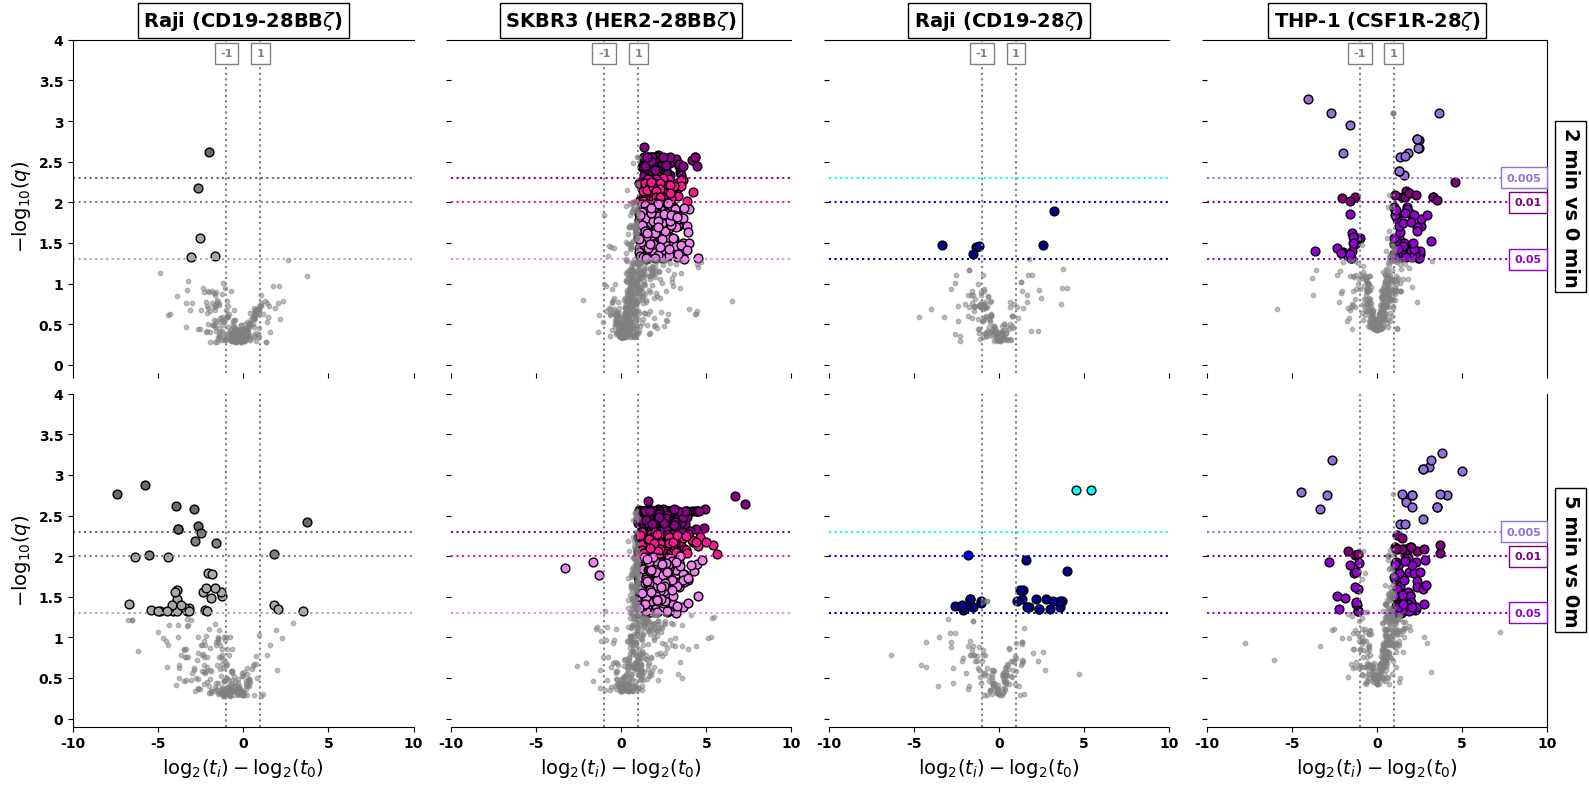

In [14]:

pepdep_volcano_arr(file_dfs[:4],
                   ["qvalues for SILAC timepoint1",
                    "qvalues for SILAC timepoint2"],
                   ["SILAC ratio 23 for user selected SILAC timepoint1",
                    "SILAC ratio 23 for user selected SILAC timepoint2"],
                    wide = True,
                   left_labels = leftlabs,
                   right_labels = rightlabs,
                   bottom_labels = bottomlabs,
                   colours = volcolours,
                   top_labels = toplabs[0],
                   xlim = 10, ylim = 4,
                   fc_transform = "log2",
                   sig_transform = "log10",
                   fc_label_transform = "none",
                   sig_cutoffs = sigs,
                   fc_cutoff = 1,
                   save = f"tests/volctest_target.pdf")



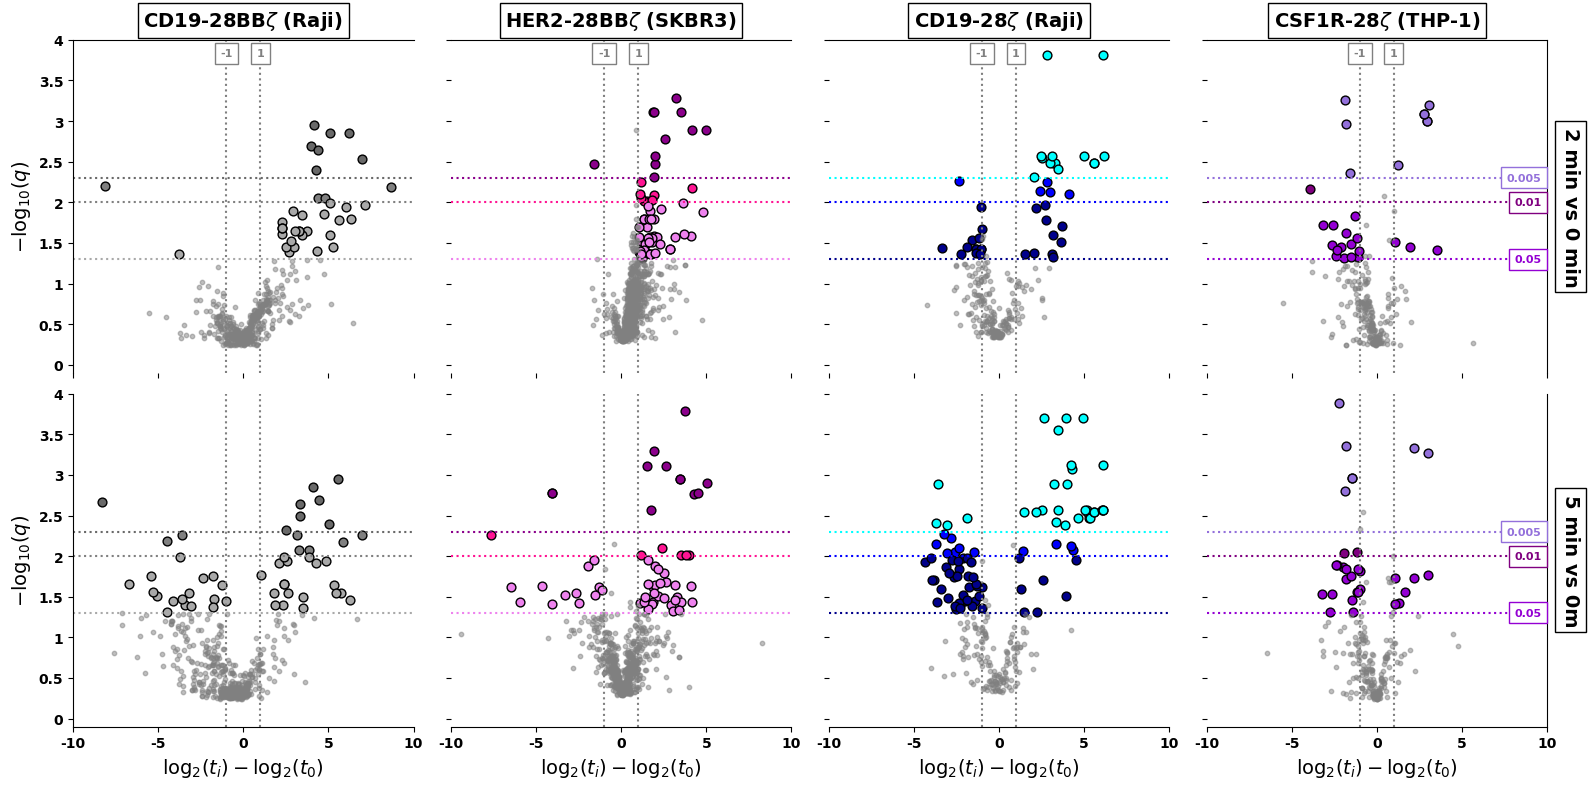

In [15]:
pepdep_volcano_arr(file_dfs[4:],
                   ["qvalues for SILAC timepoint1",
                    "qvalues for SILAC timepoint2"],
                   ["SILAC ratio 23 for user selected SILAC timepoint1",
                    "SILAC ratio 23 for user selected SILAC timepoint2"],
                    wide = True,
                   left_labels = leftlabs,
                   right_labels = rightlabs,
                   bottom_labels = bottomlabs,
                   colours = volcolours,
                   top_labels = toplabs[1],
                   xlim = 10, ylim = 4,
                   fc_transform = "log2",
                   sig_transform = "log10",
                   fc_label_transform = "none",
                   sig_cutoffs = sigs,
                   fc_cutoff = 1,
                   save = f"tests/volctest_car.pdf")

In [82]:
all_peps = [[Peptide(list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "rep" in col]].astype(float)), 
                   ["0m R1", "0m R2", "0m R3", "0m R4",
                    "2m R1", "2m R2", "2m R3", "2m R4",
                    "5m R1", "5m R2", "5m R3", "5m R4"],
                    ["0m", "2m", "5m"],
                    file_dfs[j].iloc[i]["assigned sequence"],
                    statistics = list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "qvalue" in col]].astype(float)),
                    statistics_headers = ["2m vs 0m qvalue", "5m vs 0m qvalue"],
                     foldchange = list(np.log2(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "ratio" in col]].astype(float))),
                    foldchange_headers = ["2m vs 0m", "5m vs 0m"],
                     sites = fr'$^{{{file_dfs[j].iloc[i]["phosphosite annotated"]}}}$',
                     gene = str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]),
                     unique_id = str(file_dfs[j].iloc[i]["U_ID"]),
                     colours = colours[j],
                     markers = ["s", "o", "D"]) 
            for i in range(len(file_dfs[j])) if str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]) != str("nan")]
            for j in range(len(file_dfs))]





In [83]:
def make_all_pepplots(peptide_list, path = "outputs/graphics",
                      subset = ["all"], exclude = [], comparisons = [],
                      foldchange_group = None,
                      fc_max= None):
    """
    """
    max_val = ceil(max([max(p.vals) for p in peptide_list]))
    min_val = floor(min([min(p.vals) for p in peptide_list]))
    hm_max = ceil(max([max(p.means) for p in peptide_list]))
    hm_min = floor(min([min(p.means) for p in peptide_list]))
    hm = [-max([abs(hm_min), abs(hm_max)]), max([abs(hm_min), abs(hm_max)])]
    if fc_max == None:
        fc_max = ceil(max([max(p.fc) for p in peptide_list]))
        fc_min = floor(min([min(p.fc) for p in peptide_list]))
        fc = [-max([abs(fc_min), abs(fc_max)]), max([abs(fc_min), abs(fc_max)])]
    else:
        fc = [-fc_max, fc_max]
    for p in peptide_list:
        skip = False
        if not os.path.exists(f"{path}/{p.gene.lower()}/heatmaps"):
            os.makedirs(f"{path}/{p.gene.lower()}/heatmaps")
#            skip = False
#        else:
#            skip = True
        if not os.path.exists(f"{path}/{p.gene.lower()}/dotplots"):
            os.makedirs(f"{path}/{p.gene.lower()}/dotplots")
#        if skip:
#            continue
        else:
            #p.heatmap(d_type = "intensity",
            #      path = f"{path}/{p.gene.lower()}/heatmaps/", 
            #      maxs = hm,
            #      subset = subset, exclude = exclude)
#            try:
            p.heatmap(d_type = "foldchange",
                          path = f"{path}/{p.gene.lower()}/heatmaps/", 
                          maxs = [-10,10],
                          subset = subset, exclude = exclude)
#            except:
#                print('fail')
#                continue
        #p.dotplot(path = f"{path}/{p.gene.lower()}/dotplots/", 
        #          comparisons = comparisons, maxs = [min_val, max_val],
        #         subset = subset, exclude = exclude,
        #          dotplot_args = dict(foldchange_axis = True,
        #                              foldchange_group = foldchange_group,
        #                               rotation = 20, anchor = "right",
        #                              foldchange_logged = True,
        #                       
        #                              label = r"log$_{2}$(Relative Abundance)",
        #                              p_or_q = "q"))
        plt.close()

In [27]:
outpaths = ["tests/28bbz_L_raji_H_heavy",
            "tests/28bbz_L_skbr3_H_heavy",
            "tests/28z_H_raji_L_light",
            "tests/28z_H_thp1_L_light",
            "tests/28bbz_L_raji_H_light",
            "tests/28bbz_L_skbr3_H_light",
            "tests/28z_H_raji_L_heavy",
            "tests/28z_H_thp1_L_heavy"]

for path in outpaths:
    if not os.path.exists(path):
        os.mkdir(path)

i=0
for peps in all_peps:
    print(outpaths[i])
    make_all_pepplots(peps, path = outpaths[i],
                  subset = ["m"], exclude = ["30m"],
                  comparisons = ["2m vs 0m qvalue",
                                 "5m vs 0m qvalue"],
                  foldchange_group = " 0m",
                      fc_max = 10)
    i+=1

tests/28bbz_L_raji_H_heavy
tests/28bbz_L_skbr3_H_heavy
$^{y1005}$
$^{y1112}$
$^{y877}$
tests/28z_H_raji_L_light
tests/28z_H_thp1_L_light
tests/28bbz_L_raji_H_light
tests/28bbz_L_skbr3_H_light
tests/28z_H_raji_L_heavy
tests/28z_H_thp1_L_heavy


In [16]:
imp_main(".", "qvalue", "./r_scripts/ssGSEA2.0.R", "./database/ptm.sig.db.all.flanking.human.v2.0.0.gmt")



Checking the input arguments for validity...
Finding all GCT files with name qvalue in directory /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project...
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/qvalue.gct...
Writing the file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/run_ptmsea.R...
Using subprocess to call: Rscript /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/run_ptmsea.R


parsing as GCT v1.3
/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/qvalue.gct 528 rows, 2 cols, 0 row descriptors, 0 col descriptors
parsing as GCT v1.3
/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/qvalue_unique.gct 528 rows, 2 cols, 0 row descriptors, 0 col descriptors


main loop: 1.62741 
[1] "Total gene sets: 157"
[1] "Unique gene sets: 157"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-scores.gct 
Dimensions of matrix: [157x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-pvalues.gct 
Dimensions of matrix: [157x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [157x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-combined.gct 
Dimensions of matrix: [157x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_targe

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
P

main loop: 1.547211 
[1] "Total gene sets: 153"
[1] "Unique gene sets: 153"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-scores.gct 
Dimensions of matrix: [153x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-pvalues.gct 
Dimensions of matrix: [153x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [153x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-combined.gct 
Dimensions of matrix: [153x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_targ

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.205664 
[1] "Total gene sets: 94"
[1] "Unique gene sets: 94"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-scores.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-combined.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE


main loop: 1.171706 
[1] "Total gene sets: 94"
[1] "Unique gene sets: 94"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-scores.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-combined.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.136248 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_proje

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/28Z_qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE

main loop: 1.112577 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_raji/pY_data/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_proje

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.113255 
[1] "Total gene sets: 135"
[1] "Unique gene sets: 135"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-scores.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-combined.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_proje

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PER

main loop: 1.00047 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28z_thp1/pY_data/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_projec

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.162637 
[1] "Total gene sets: 124"
[1] "Unique gene sets: 124"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-scores.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-pvalues.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-combined.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_targ

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
P

main loop: 1.112918 
[1] "Total gene sets: 124"
[1] "Unique gene sets: 124"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-scores.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-pvalues.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28bbz/pY_data/output-combined.gct 
Dimensions of matrix: [124x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_targ

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 48.16981 
[1] "Total gene sets: 94"
[1] "Unique gene sets: 94"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-scores.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-combined.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raj

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PER

main loop: 48.72377 
[1] "Total gene sets: 94"
[1] "Unique gene sets: 94"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-scores.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/raji_28z/pY_data/output-combined.gct 
Dimensions of matrix: [94x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skb

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 2.545613 
[1] "Total gene sets: 182"
[1] "Unique gene sets: 182"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-scores.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-pvalues.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-combined.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE


main loop: 2.506225 
[1] "Total gene sets: 182"
[1] "Unique gene sets: 182"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-scores.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-pvalues.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/skbr3_28bbz/pY_data/output-combined.gct 
Dimensions of matrix: [182x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.319985 
[1] "Total gene sets: 135"
[1] "Unique gene sets: 135"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-scores.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-combined.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_proje

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PER

main loop: 1.28947 
[1] "Total gene sets: 135"
[1] "Unique gene sets: 135"
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-scores.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-fdr-pvalues.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
Saving file to  /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/thp1_28z/pY_data/output-combined.gct 
Dimensions of matrix: [135x2]
Setting precision to 4
Saved.
ssGSEA2.0 run is complete!! :)



Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

In [17]:
from py_scripts import managing_ssgsea_outputs as mso

mso.imp_main(".", "output-combined.gct")

Checking the input arguments for validity...
Finding all GCT files with name output-combined.gct in directory /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project...
Creating the filtered output file, used for heatmap creation...
File: /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output-combined.gct
Headers found:
	id
	fdr.pvalue.2m_vs_0m
	fdr.pvalue.5m_vs_0m
	2m_vs_0m
	5m_vs_0m
Finding all values associated with headers.
Writing the output file to: /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_raji/pY_data/output_combined_heatmap.txt...
Creating the filtered output file, used for heatmap creation...
File: /windir/c/Users/redas/desktop/jupyter_directory/salomon_lab_folder/car_target_project/28bbz_skbr3/pY_data/output-combined.gct
Headers found:
	id
	fdr.pvalue.2m_vs_0m
	fdr.pvalue.5m_vs_0m
	2m_vs_0m
	5m_vs_0m
Finding all values associated with heade

In [92]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle
#from helpers import general_helpers

def find_ids(str_list, delim = "_", position = 0, obj = []):
    new_ids = {}
    for s in str_list:
        newid = s.split(delim)[position]
        if newid not in list(new_ids.keys()):
            new_ids[newid] = obj
    return new_ids

def split_by_dbtype(sea_hm_file, delim = "_", id_col = 0, position = 0):
    # read the file, bin by id_col split on delim, return dict of sublists
    parsed = find_ids(gh.transpose(*sea_hm_file)[0][1:], delim = delim, position = position)
    parsed = {key : [sea_hm_file[0]] for key, value in parsed.items()}
    for row in sea_hm_file[1:]:
        newrow = [gh.list_to_str(row[0].split(delim)[1:], delimiter = " ", newline = False)] + [float(item) for item in row[1:]]
        parsed[row[id_col].split(delim)[position]].append(newrow)
    return parsed

def find_radius(sig, sig_mapper = {1 : 0.1,
                                   0.05 : 0.2,
                                   0.005 : 0.3,
                                   0.0005 : 0.4,
                                   0.00005 : 0.49}):
    if float(sig) != float(sig):
        return 0
    holder = 0.1
    for thresh in list(sig_mapper.keys()):
        if sig <= thresh:
            holder = sig_mapper[thresh]
    return holder

def score_to_colour(score, low = 0, high = 0.99999999, max_score = 1, cmap = cm.get_cmap("bwr")):
    if float(score) != float(score):
        return "grey"
    mid = (low+high)/2
    moved_low = low - mid
    moved_high = high - mid
    scalar = moved_high/max_score
    color = (score*scalar) + mid
    return cmap(color)

def all_scores_to_colours(score_matrix, **stc_kwargs):
    # This should be a n (rows) x m (cols) matrix of scores (numbers)
    return [[score_to_colour(score, **stc_kwargs) for score in row] for row in score_matrix]

def find_all_radii(sig_matrix, sig_mapper = {1 : 0.1,
                                   0.05 : 0.2,
                                   0.005 : 0.3,
                                   0.0005 : 0.4,
                                   0.00005 : 0.49}):
    return [[find_radius(sig, sig_mapper = sig_mapper) for sig in row] for row in sig_matrix]

def sea_arr_poss(w,h, colours = None, radii = None):
    if colours == None:
        colours = [["grey" for j in range(w)] for i in range(h)]
    if radii == None:
        radii = [[0.1 for j in range(w)] for i in range(h)]
    arr = [[Circle((i,j), radii[i][j],ec="black", color=colours[i][j]) for j in range(w)] for i in range(h)]
    return arr

In [63]:
# Use the functions above to make th PTM-SEA circle array

test_path = "./raji_28z/pY_data/output_combined_heatmap.txt" # tab delimited

test = gh.read_file(test_path)

test = split_by_dbtype(test)

test = {key : [value[0]] + [row for row in value[1:] if any([item < 0.05 for item in row[1:3]])] for key, value in test.items()}

test

{'PERT-PSP': [['id',
   'fdr.pvalue.2m_vs_0m',
   'fdr.pvalue.5m_vs_0m',
   '2m_vs_0m',
   '5m_vs_0m'],
  ['VIRUS INFECTION', 0.001275, 0.264829239065309, 3.5584, 1.8717],
  ['VANADATE', 0.00634454617834395, 0.735794425023336, 3.4029, 0.6912],
  ['UV', 0.001275, 0.207063572149344, 4.0615, 2.2253],
  ['U0126', 0.001275, 0.422140092744325, -3.6015, -1.499],
  ['TNF', 0.001275, 0.264180593664255, 3.5317, 1.9139],
  ['THROMBIN', 0.00160617274230376, 0.117559322033898, 3.9024, 2.5793],
  ['PHORBOL ESTER IONOMYCIN',
   0.00160617274230376,
   0.262401259041797,
   3.5235,
   1.9317],
  ['PHORBOL ESTER', 0.001275, 0.131268851799718, 3.9042, 2.4617],
  ['PAR2 ACTIVATING PEPTIDE', 0.001275, 0.262401259041797, 3.48, 1.9422],
  ['PAR1 ACTIVATING PEPTIDE',
   0.00689096068098906,
   0.317707394996337,
   3.2722,
   1.7963],
  ['OKADAIC ACID', 0.035104088593848, 0.452568428946382, 2.7876, 1.3681],
  ['LPS', 0.00528459759991192, 0.23729609585338, 3.492, 2.0797],
  ['LPA', 0.00160617274230376, 0.2624

In [20]:
test

[['id', 'fdr.pvalue.2m_vs_0m', 'fdr.pvalue.5m_vs_0m', '2m_vs_0m', '5m_vs_0m'],
 ['PERT-PSP_UV', '0.362384047103261', '1', '-1.9139', '0.059'],
 ['PERT-PSP_TNF',
  '0.549735175921134',
  '0.680721208745073',
  '-1.4802',
  '1.0683'],
 ['PERT-PSP_PHORBOL_ESTER', '0.820273941354568', '1', '0.6401', '-0.1254'],
 ['PERT-PSP_H2O2', '0.820273941354568', '1', '0.6271', '-0.1246'],
 ['PERT-PSP_ETOPOSIDE',
  '0.362713200563858',
  '0.32197384526187',
  '-1.9208',
  '-2.2326'],
 ['PERT-PSP_EGF',
  '0.355248381556348',
  '0.0396279822078447',
  '2.0898',
  '3.6553'],
 ['PERT-PSP_ANTI_CD3',
  '0.778905875334823',
  '0.260763131286254',
  '-0.7865',
  '2.7273'],
 ['PERT-P100-DIA2_VORINOSTAT', '0.228212957572445', '1', '-2.2683', '0.0416'],
 ['PERT-P100-DIA2_RGFP966',
  '0.228212957572445',
  '0.73957395739574',
  '-2.2442',
  '-0.9103'],
 ['PATH-NP_TWEAK_PATHWAY',
  '0.549735175921134',
  '0.680721208745073',
  '-1.4604',
  '1.066'],
 ['PATH-NP_TSLP_PATHWAY',
  '0.0261490227469815',
  '0.81959140214

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

cmap = cm.get_cmap("bwr")
rgba = cmap(0.499999995)

points = sea_arr_poss(2,3, colours = all_scores_to_colours(fake_scores, max_score = 10),
                      radii = find_all_radii(fake_qs))

for r in points:
    for p in r:
        ax.add_artist(p)

ax.set_xlim(-0.52,2.52)
ax.set_ylim(-0.52,2.52)